In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-05-26 03:25:47--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   133KB/s    in 0.5s    

2020-05-26 03:25:49 (133 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



#### FuleConsumption.csv
The fuel consumption dataset contains model-specific fuel consumption rating and estimated carbon dioxide emmssions for new light-duty vehicles for retail sale in Canada.

#### Reading Data

In [4]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Data Exploration

In [5]:
#summarizing the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


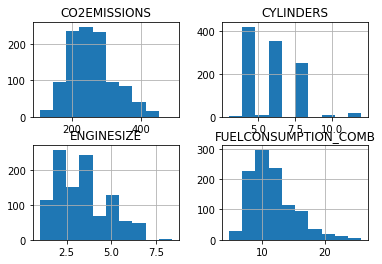

<Figure size 504x504 with 0 Axes>

In [10]:
#Plotting the above features
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
viz.hist()
fig = plt.figure(figsize = (7, 7))
plt.show()

##### Plotting the linear relation of all the features vs the Emission

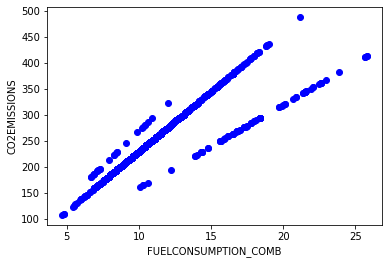

In [11]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

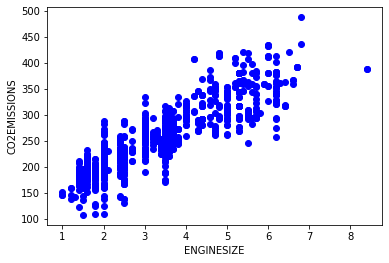

In [12]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

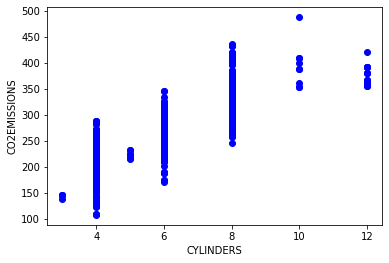

In [13]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

Splitting the dataset into training and testing data with 80% of entire data used for training and the remaining 20% of the data used for testing. Mask used to select random rows using np.random

In [14]:
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf [~mask]

#### Simple Linear Regression
Train Data Distribution

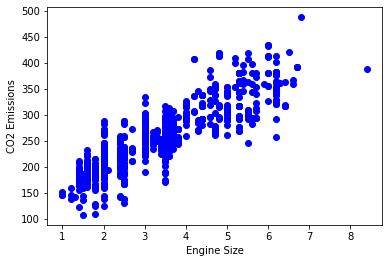

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

#### Modeling
Using sklearn package to model data

In [17]:
from sklearn import linear_model

regression = linear_model.LinearRegression()
trainX = np.asanyarray(train[['ENGINESIZE']])
trainY = np.asanyarray(train[['CO2EMISSIONS']])
regression.fit(trainX, trainY)
print('Coefficients : ', regression.coef_)
print('Intercept : ', regression.intercept_)

Coefficients :  [[39.09328119]]
Intercept :  [125.52487135]


Plotting the fitness line over the data

Text(0, 0.5, 'Emissions')

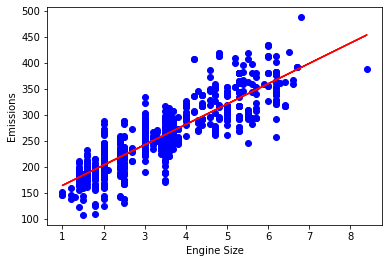

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.plot(trainX, regression.coef_[0][0] * trainX + regression.intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')

#### Evaluation and Testing

Actual and predicted values compared to calculate accuracy of predicted model. Different ways to calculate errors

- Mean Absolute Error : Mean of the absolute values of the error.
- Mean Squared Error (MSE) : Mean of the squared error. Squared term exponentially increases larger errors in comaprison to smaller ones
- Root Mean Squared Error (RMSE) : Square Root of mean square error
- R Squared : Not an error but an accuracy metric that represents how close the data are to the fitted regression line. The higher the value the better the model fit. Best score 1.0.

In [19]:
from sklearn.metrics import r2_score

testX = np.asanyarray(test[['ENGINESIZE']])
testY = np.asanyarray(test[['CO2EMISSIONS']])
testYhat = regression.predict(testX)

print('Mean absolute error : %.2f' % np.mean(np.absolute(testYhat - testY)))
print('Residual sum of squares (MSE) : %.2f' % np.mean((testYhat - testY) ** 2))
print('R2 - score : %.2f' % r2_score(testYhat, testY))

Mean absolute error : 21.24
Residual sum of squares (MSE) : 804.67
R2 - score : 0.74
